In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [39]:
data = pd.DataFrame()
for root,dirs,files in os.walk("./"):
    for file in files:
        if file.endswith(".csv"):
            data = pd.concat([data, pd.read_csv(file)])

In [40]:
assert ((data["orig_value"] - data["value"]) == 0).all()

In [41]:
assert ((data["name"] == "%H") & (data["variable"] == "Humditiy") | (data["name"] == "°C") & (data["variable"] == "Temperature")).all()

In [42]:
data.shape[0]

8398

In [43]:
data.time = pd.to_datetime(data.time)

In [44]:
columns = ["time", "value"]
humidity = data[data["variable"] == "Humditiy"][columns].sort_values("time", ascending=False).set_index("time")
temperature = data[data["variable"] == "Temperature"][columns].sort_values("time", ascending=False).set_index("time")

In [45]:
humidity.head()

,value
time,
2024-01-08 15:02:42,89.0
2024-01-08 14:52:42,89.0
2024-01-08 14:42:42,89.0
2024-01-08 14:32:42,89.0
2024-01-08 14:22:42,89.0


In [46]:
# The best ripening conditions to obtain an optimum between sensory qualities and cheese ripening properties appeared to be 13°C and 94% RH
# https://www.sciencedirect.com/science/article/pii/S0022030214008637

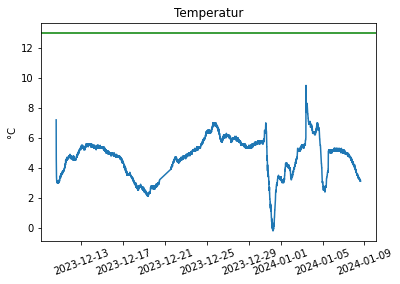

In [51]:
plt.plot(temperature);
plt.axhline(13, color="g");
plt.xticks(rotation=20);
plt.title("Temperatur");
plt.ylabel("°C");
plt.savefig("temperature.png");

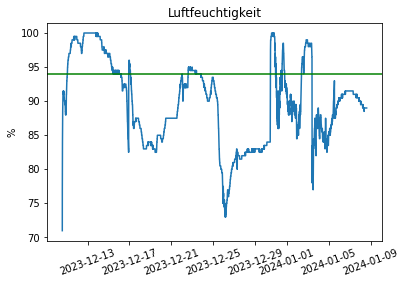

In [52]:
plt.plot(humidity);
plt.axhline(94, color="g");
plt.xticks(rotation=20);
plt.title("Luftfeuchtigkeit");
plt.ylabel("%");
plt.savefig("humidity.png");